In [1]:
import cf_xarray
import fsspec
import numpy as np
import xarray as xr

import xarray_subset_grid.accessor  # noqa: F401

# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem(
    "reference",
    fo="s3://nextgen-dmac-cloud-ingest/nos/ngofs2/nos.ngofs2.2ds.best.nc.zarr",
    remote_protocol="s3",
    remote_options={"anon": True},
    target_protocol="s3",
    target_options={"anon": True},
)
m = fs.get_mapper("")

ds = xr.open_dataset(
    m,
    engine="zarr",
    backend_kwargs=dict(consolidated=False),
    chunks={},
    drop_variables=["Itime2"],
)
ds

<xarray.Dataset> Size: 20GB
Dimensions:             (time: 775, four: 4, nele: 569405, node: 303714,
                         three: 3, maxnode: 10, maxelem: 8)
Coordinates:
    lat                 (node) float32 1MB dask.array<chunksize=(303714,), meta=np.ndarray>
    latc                (nele) float32 2MB dask.array<chunksize=(569405,), meta=np.ndarray>
    lon                 (node) float32 1MB dask.array<chunksize=(303714,), meta=np.ndarray>
    lonc                (nele) float32 2MB dask.array<chunksize=(569405,), meta=np.ndarray>
  * time                (time) datetime64[ns] 6kB 2024-02-13T03:00:00 ... 202...
Dimensions without coordinates: four, nele, node, three, maxnode, maxelem
Data variables: (12/39)
    Itime               (time) datetime64[ns] 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    Times               (time) |S26 20kB dask.array<chunksize=(1,), meta=np.ndarray>
    a1u                 (four, nele) float32 9MB dask.array<chunksize=(4, 569405), meta=np.ndarray>
    a2u                 (four, nele) float32 9MB dask.array<chunksize=(4, 569405), meta=np.ndarray>
    art1                (node) float32 1MB dask.array<chunksize=(303714,), meta=np.ndarray>
    art2                (node) float32 1MB dask.array<chunksize=(303714,), meta=np.ndarray>
    ...                  ...
    wet_nodes_prev_int  (time, node) int32 942MB dask.array<chunksize=(1, 303714), meta=np.ndarray>
    x                   (node) float32 1MB dask.array<chunksize=(303714,), meta=np.ndarray>
    xc                  (nele) float32 2MB dask.array<chunksize=(569405,), meta=np.ndarray>
    y                   (node) float32 1MB dask.array<chunksize=(303714,), meta=np.ndarray>
    yc                  (nele) float32 2MB dask.array<chunksize=(569405,), meta=np.ndarray>
    zeta                (time, node) float32 942MB dask.array<chunksize=(1, 303714), meta=np.ndarray>
Attributes: (12/14)
    Conventions:                 CF-1.0
    CoordinateProjection:        init=nad83:4205
    CoordinateSystem:            GeoReferenced
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    River_Forcing:               THERE ARE 63 RIVERS IN THIS MODEL.\nRIVER IN...
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    ...                          ...
    Tidal_Forcing:               TIDAL ELEVATION FORCING IS OFF!
    history:                     model started at: 13/02/2024   03:15
    institution:                 School for Marine Science and Technology
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    source:                      FVCOM_4.3
    title:                       NGOFS2

In [2]:
f"Dataset size: {ds.nbytes * 1.0e-9} Gb"

'Dataset size: 19.984805830000003 Gb'

# Example: Subset FVCOM dataset given a polygon

### Example Polygon

Drawn with: https://geojson.io

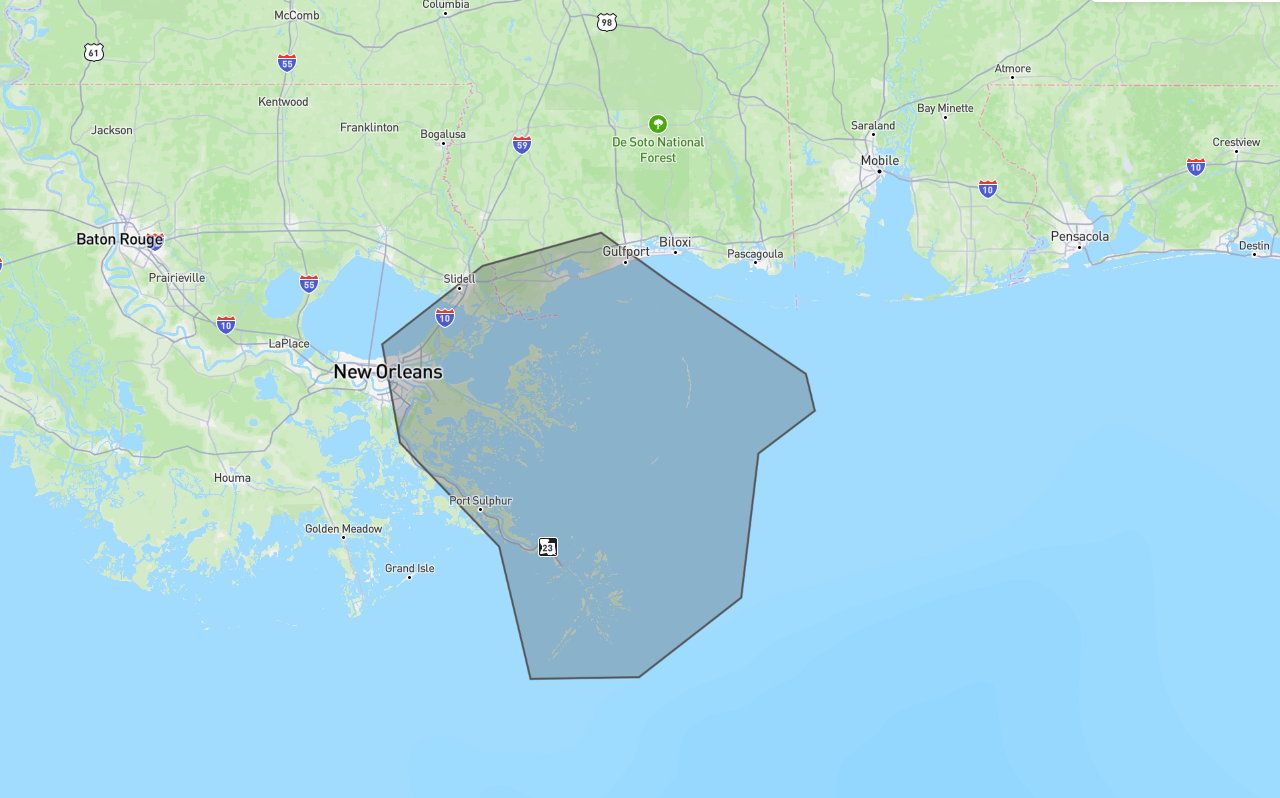

In [3]:
polygon = np.array(
    [
        [-88.90580394001934, 30.29241252023394],
        [-89.19516286474344, 30.472177580997183],
        [-89.68564387438431, 30.353800554455674],
        [-90.10008710994322, 30.07406870382799],
        [-90.02651730481438, 29.72115942943863],
        [-89.61697872293067, 29.347768286358786],
        [-89.48700540053677, 28.869972870160396],
        [-89.03822958925102, 28.876415308359796],
        [-88.6164293731791, 29.163769289372496],
        [-88.54531189488806, 29.682817158850725],
        [-88.31234084531368, 29.836098340764792],
        [-88.3491257478779, 29.967902324410517],
        [-88.90580394001934, 30.29241252023394],
    ]
)

# adjust to match the coordinate system of the dataset
polygon[:, 0] = polygon[:, 0] + 360
polygon

array([[271.09419606,  30.29241252],
       [270.80483714,  30.47217758],
       [270.31435613,  30.35380055],
       [269.89991289,  30.0740687 ],
       [269.9734827 ,  29.72115943],
       [270.38302128,  29.34776829],
       [270.5129946 ,  28.86997287],
       [270.96177041,  28.87641531],
       [271.38357063,  29.16376929],
       [271.45468811,  29.68281716],
       [271.68765915,  29.83609834],
       [271.65087425,  29.96790232],
       [271.09419606,  30.29241252]])

In [4]:
ugrid = ds.subset_grid.grid
assert(ugrid is not None)

# get the subset of the grid that is within the polygon
ds_subset = ugrid.subset_polygon(ds, polygon)
ds_subset

<xarray.Dataset> Size: 4GB
Dimensions:             (time: 775, four: 4, nele: 99246, node: 54024,
                         three: 3, maxnode: 10, maxelem: 8)
Coordinates:
    lat                 (node) float32 216kB dask.array<chunksize=(54024,), meta=np.ndarray>
    latc                (nele) float32 397kB dask.array<chunksize=(99246,), meta=np.ndarray>
    lon                 (node) float32 216kB dask.array<chunksize=(54024,), meta=np.ndarray>
    lonc                (nele) float32 397kB dask.array<chunksize=(99246,), meta=np.ndarray>
  * time                (time) datetime64[ns] 6kB 2024-02-13T03:00:00 ... 202...
Dimensions without coordinates: four, nele, node, three, maxnode, maxelem
Data variables: (12/39)
    Itime               (time) datetime64[ns] 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    Times               (time) |S26 20kB dask.array<chunksize=(1,), meta=np.ndarray>
    a1u                 (four, nele) float32 2MB dask.array<chunksize=(4, 99246), meta=np.ndarray>
    a2u                 (four, nele) float32 2MB dask.array<chunksize=(4, 99246), meta=np.ndarray>
    art1                (node) float32 216kB dask.array<chunksize=(54024,), meta=np.ndarray>
    art2                (node) float32 216kB dask.array<chunksize=(54024,), meta=np.ndarray>
    ...                  ...
    wet_nodes_prev_int  (time, node) int32 167MB dask.array<chunksize=(1, 54024), meta=np.ndarray>
    x                   (node) float32 216kB dask.array<chunksize=(54024,), meta=np.ndarray>
    xc                  (nele) float32 397kB dask.array<chunksize=(99246,), meta=np.ndarray>
    y                   (node) float32 216kB dask.array<chunksize=(54024,), meta=np.ndarray>
    yc                  (nele) float32 397kB dask.array<chunksize=(99246,), meta=np.ndarray>
    zeta                (time, node) float32 167MB dask.array<chunksize=(1, 54024), meta=np.ndarray>
Attributes: (12/14)
    Conventions:                 CF-1.0
    CoordinateProjection:        init=nad83:4205
    CoordinateSystem:            GeoReferenced
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    River_Forcing:               THERE ARE 63 RIVERS IN THIS MODEL.\nRIVER IN...
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    ...                          ...
    Tidal_Forcing:               TIDAL ELEVATION FORCING IS OFF!
    history:                     model started at: 13/02/2024   03:15
    institution:                 School for Marine Science and Technology
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    source:                      FVCOM_4.3
    title:                       NGOFS2

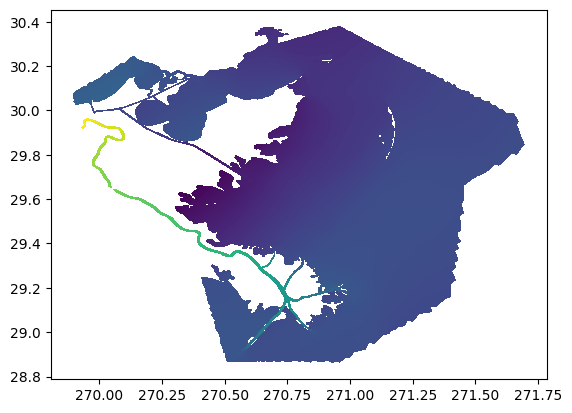

In [5]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

zeta = ds_subset.zeta.isel(time=0)
tris = tri.Triangulation(zeta.cf['longitude'], zeta.cf['latitude'], ds_subset[ds_subset.fvcom_mesh.face_node_connectivity].T - 1)
plt.tripcolor(tris, zeta, shading='flat')

In [6]:
f"Subset dataset size: {ds_subset.nbytes * 1.0e-6} Mb"

'Subset dataset size: 3510.419202 Mb'